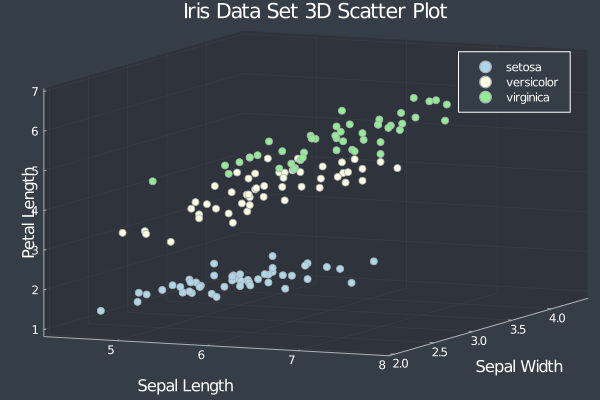

In [196]:
using RDatasets
using Plots
theme(:dark)
using CSV

iris = dataset("datasets", "iris")
X_data = [x for x in zip(iris.SepalLength, iris.SepalWidth, iris.PetalLength)]
Y_data = [iris.Species[i] for i = 1:150]

scatter(xaxis = "Sepal Length",
        yaxis = "Sepal Width", 
        zaxis = "Petal Length",
        title = "Iris Data Set 3D Scatter Plot")

scatter!(X_data[1:50], 
        label = "setosa", 
        color = "lightblue")

scatter!(X_data[51:100], 
        label = "versicolor", 
        color = "lightyellow")

scatter!(X_data[101:150], 
        label = "virginica", 
        color = "lightgreen")

In [2]:
# Define the Euclidean distance formula as a function
function euclidean_distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

# Test the function euclidean_distance to make sure it works!
print("The distance between ", X_data[1]," and", X_data[50])
println(" is ", euclidean_distance(X_data[1], X_data[50]))

The distance between (5.1, 3.5, 1.4) and(5.0, 3.3, 1.4) is 0.22360679774997896


In [56]:
""" For a given point p, a collection of points X with labels Y, and a positive integer k,
    find the k nearest neighbors to point p.
"""
function k_nearest_neighbors(p, X, Y, k)
    # Calculate the distance between p and all other points in X
    distance_array = [(X[i], Y[i], euclidean_distance(p, X[i])) 
                      for i = 1:length(X)
                      if X[i] != p
                      ]
    # Sort the distance array in ascending order according to distance
    sort!(distance_array, by = x -> x[3])     # Python = distance_array.sort(key = lambda x : x[2])
    
    # Return the first k entries from the sorted distance array 
    return distance_array[1:k]                # Python = distance_array[0:k-1]
end 

# Test the k_nearest_neighbors function
test = k_nearest_neighbors(X_data[120], X_data, Y_data, 5)

println("")
println("Target Point P = ", X_data[120])
println("k = ", 5)
println("____________________________________")
for i = 1:length(test)
    println("Point $i = ", test[i][1])
    println("Point Label = ", test[i][2])
    println("Point Distance = ", test[i][3])
    if i != length(test)
        println("")
    else
      println("____________________________________")  
    end
end
println("")


Target Point P = (6.0, 2.2, 5.0)
k = 5
____________________________________
Point 1 = (5.7, 2.5, 5.0)
Point Label = virginica
Point Distance = 0.4242640687119283

Point 2 = (6.3, 2.5, 5.0)
Point Label = virginica
Point Distance = 0.4242640687119283

Point 3 = (6.3, 2.5, 4.9)
Point Label = versicolor
Point Distance = 0.43588989435406705

Point 4 = (6.0, 2.7, 5.1)
Point Label = versicolor
Point Distance = 0.5099019513592784

Point 5 = (6.2, 2.2, 4.5)
Point Label = versicolor
Point Distance = 0.5385164807134505
____________________________________



In [142]:
function predict( index,X, Y, k, point_color = "red", show_img = false)
    
    point = X[index]
    neighbors = k_nearest_neighbors(point, X, Y, k)
    setosa_count = sum([1 for x in neighbors if x[2] == "setosa"])
    versicolor_count = sum([1 for x in neighbors if x[2] == "versicolor"])
    virginica_count = sum([1 for x in neighbors if x[2] == "virginica"])
    
    
    
    if show_img == true
        scatter(xaxis = "Sepal Length",
                yaxis = "Sepal Width", 
                zaxis = "Petal Length",
                title = "Iris Data Set 3D Scatter Plot")
        for x in neighbors
            plot!([point, x[1]], color = point_color, label = false)
        end
    
    
        scatter!(X[1:50], 
                label = "setosa", 
                color = "lightblue")
        scatter!(X[51:100], 
                    label = "versicolor", 
                color = "lightyellow")
        scatter!(X[101:150], 
                label = "virginica", 
                color = "lightgreen")
        scatter!(point, color = point_color, label = "target")
    end

    
    
    println("     P(setosa)       |       P(versicolor)     |     P(virginica)")
    println("------------------------------------------------------------------")
    print("        ", setosa_count // k,"        |             ", versicolor_count//k)
    print("        |        ", virginica_count//k)
    println(" ")
    println()
    
    
    
    
    return neighbors
    
end

predict (generic function with 11 methods)

In [197]:
X_data[77]

(6.8, 2.8, 4.8)

In [143]:
# Test the predict function to make sure it works!
predict(77,X_data, Y_data, 13,"red",true)

     P(setosa)       |       P(versicolor)     |     P(virginica)
------------------------------------------------------------------
        0//1        |             8//13        |        5//13 



13-element Array{Tuple{Tuple{Float64,Float64,Float64},CategoricalValue{String,UInt8},Float64},1}:
 ((6.7, 3.0, 5.0), "versicolor", 0.30000000000000016)
 ((6.6, 2.9, 4.6), "versicolor", 0.30000000000000027)
 ((6.7, 3.1, 4.7), "versicolor", 0.33166247903554)   
 ((6.9, 3.1, 4.9), "versicolor", 0.3316624790355405) 
 ((6.5, 2.8, 4.6), "versicolor", 0.3605551275463989) 
 ((6.9, 3.1, 5.1), "virginica", 0.43588989435406755) 
 ((7.0, 3.2, 4.7), "versicolor", 0.45825756949558427)
 ((6.7, 3.0, 5.2), "virginica", 0.4582575694955843)  
 ((6.6, 3.0, 4.4), "versicolor", 0.4898979485566353) 
 ((6.7, 3.1, 4.4), "versicolor", 0.5099019513592782) 
 ((6.3, 2.7, 4.9), "virginica", 0.5196152422706632)  
 ((6.5, 3.0, 5.2), "virginica", 0.5385164807134506)  
 ((6.3, 2.8, 5.1), "virginica", 0.58309518948453)    

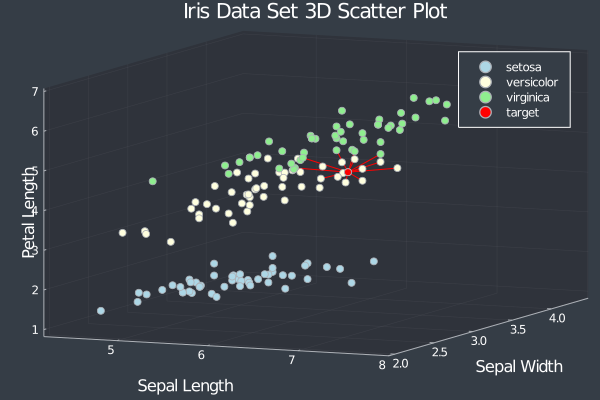

In [144]:
scatter!()

In [203]:
using Pkg
Pkg.add("CSV")
using CSV

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [376]:
data_project=CSV.read("diabetes.csv")
data_project=data_project[:,[1,2,3,4,9]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Outcome
,Int64,Int64,Int64,Int64,Int64
1,6,148,72,35,1
2,1,85,66,29,0
3,8,183,64,0,1
4,1,89,66,23,0
5,0,137,40,35,1
6,5,116,74,0,0
7,3,78,50,32,1
8,10,115,0,0,0
9,2,197,70,45,1


In [377]:
function preprocessing_data(data)
    tmp=[]
    for i=1:Int(round(length(data.Outcome)/30))
        append!(tmp,rand(1:length(data.Outcome)))
    end
    tmp2=sort(unique(tmp),rev=true)
    data_train=[]
    data_test=[]
    for i=1:length(tmp2)
        if i==1
            data_test=reshape(convert(Array,data[tmp2[i],:]),(1,length(data[1,:])))
        else
            #println(i)
            d=reshape(convert(Array,data[tmp2[i],:]),(1,length(data[1,:])))
            #println(d)
            data_test=vcat(data_test,d)
        end
        
        data_train = delete!(data, tmp2[i])
    end
    return data_test,data_train
end

preprocessing_data (generic function with 1 method)

In [378]:
data_test,data_train=preprocessing_data(data_project)
data_test

25×5 Array{Int64,2}:
  1   81  74  41  0
  1  114  66  36  0
  1  144  82  46  1
  4   94  65  22  0
  3  106  54  21  0
  2   82  52  22  0
  6  109  60  27  0
 11   85  74   0  0
  2   68  70  32  0
  0   91  68  32  0
  0  120  74  18  0
  6  107  88   0  0
  1   90  68   8  0
  3  173  84  33  1
  3  112  74  30  1
  2  108  62  10  0
  2  128  64  42  0
  3  111  56  39  0
  3  162  52  38  1
  2   99  70  16  0
  1  138  82   0  0
  0  119  64  18  0
  4   97  60  23  0
  0  101  65  28  0
  8  133  72   0  1

In [379]:
data_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Outcome
,Int64,Int64,Int64,Int64,Int64
1,6,148,72,35,1
2,1,85,66,29,0
3,8,183,64,0,1
4,1,89,66,23,0
5,0,137,40,35,1
6,5,116,74,0,0
7,3,78,50,32,1
8,10,115,0,0,0
9,2,197,70,45,1


In [380]:
X_data = [x for x in zip(data_train[:,1],data_train[:,2],data_train[:,3],data_train[:,4])]
Y_data=data_train.Outcome

743-element Array{Int64,1}:
 1
 0
 1
 0
 1
 0
 1
 0
 1
 1
 0
 1
 0
 ⋮
 0
 1
 0
 1
 0
 1
 0
 0
 0
 0
 1
 0

In [381]:
yLabel=unique(data_train.Outcome)

2-element Array{Int64,1}:
 1
 0

In [382]:
X_test = [x for x in zip(data_test[:,1],data_test[:,2],data_test[:,3],data_test[:,4])]
Y_test = data_test[:,5]

25-element Array{Int64,1}:
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 1
 0
 0
 0
 1
 0
 0
 0
 0
 0
 1

In [383]:
function project_predict(X_test,Y_test,X_data,Y_data)
    p_vector=[] 
    count=0
    for i in X_test
        class1_count=0
        class2_count=0
        neighbors = k_nearest_neighbors(i, X_data, Y_data, 3)
        class1_count = sum([1 for x in neighbors if x[2] == yLabel[1]])
        class2_count = sum([1 for x in neighbors if x[2] == yLabel[2]])
        if class1_count>=class2_count
            push!(p_vector,yLabel[1])
        else
            push!(p_vector,yLabel[2])
        end
    end
    
    for i=1:length(Y_test)
        if p_vector[i]==Y_test[i]
            count=count+1
        end
    end
    score=count/length(Y_test)
    return p_vector,Y_test,score
end

project_predict (generic function with 1 method)

In [384]:
pred_vec,label,score=project_predict(X_test,Y_test,X_data,Y_data)
println("predict:",pred_vec)
println("label:",label)
println("Score:",score*100,"%")

predict:Any[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1]
label:Int64[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
Score:84.0%
